# TP1 : Régression simple en Python : L'exemple des données GaltonFamilies

**Chargement des librairies et analyse exploratoire des données**

Le jeu de données Galton Families est disponible en Python avec la bibliothèque statsmodels. La librairie statsmodels est disponible directement dans Google Colab, vous n'aurez pas besoin de l'installer localement.

Lee jeu de données Galton Families répertorie les observations individuelles de 934 enfants dans 205 familles sur lesquelles Galton (1886) a étudié le lien entre la taille des parents et la taille des enfants. 

La première étape est de charger la librairie statsmodels et la librairie pandas, ainsi que le jeu de données GaltonFamilies.

In [1]:
import statsmodels.api as sm
import pandas as pd

Nous allons à présent explorer le jeu de données : on le charge avec la fonction get_rdataset(), qui permet de regarder les premières lignes du jeu de données GastonFamilies avec la fonction .head(). Le jeu de données est stocké dans un objet pandas DataFrame appelé df.

In [20]:
df = sm.datasets.get_rdataset("GaltonFamilies", "HistData").data
df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   family           934 non-null    object 
 1   father           934 non-null    float64
 2   mother           934 non-null    float64
 3   midparentHeight  934 non-null    float64
 4   children         934 non-null    int64  
 5   childNum         934 non-null    int64  
 6   gender           934 non-null    object 
 7   childHeight      934 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 58.5+ KB


Les données sont organisées en tableau, appelé ici dataframe car il est construit avec la bibliothèque pandas, dans lequel chaque colonne peut avoir un type différent. En utilisant la fonction info(), nous pouvons voir les différentes variables et leur type.

Nous avons donc 934 observations de 8 variables :

*   famille, un objet donnant un identifiant pour chaque famille
*   père, un double donnant la taille du père
*   mère, un double donnant la taille de la mère
*   midparentHeight, un double donné par la moyenne de la taille du père et de celle de la mère multipliée par 1.08
*   children, un entier spécifiant le nombre d'enfants au sein de la famille
*   childNum, un entier spécifiant le rang de l'enfant au sein de la famille
*   gender, un objet donnant le genre de l'enfant
*   childHeight, un double donnant la taille de l'enfant.



Les types de la colonne sont explicites, sauf peut-être celui de l'objet. Elle correspond à une variable qualitative qui a plusieurs modalités. Les autres types de colonnes que vous rencontrerez facilement sont les Category pour pandas Dataframe, qui sont assez explicites.

Notez que la hauteur a été corrigée pour le genre dans le midparentHeight mais pas dans le childHeight. Nous pouvons facilement créer une nouvelle colonne (variable) childHeightC qui applique le même facteur de 1,08 à la femelle.
à la femelle. 


In [24]:
#fill in the blanks 
df.loc[df["gender"] == "female", "childHeightC"] = df[df["gender"] == "female"]["childHeight"] * 1.08

df.loc[df["gender"] == "male", "childHeightC"] = df[df["gender"] == "male"]["childHeight"]

In [25]:
df

,family,father,mother,midparentHeight,children,childNum,gender,childHeight,childHeightC
0,001,78.5,67.0,75.43,4,1,male,73.2,73.200
1,001,78.5,67.0,75.43,4,2,female,69.2,74.736
2,001,78.5,67.0,75.43,4,3,female,69.0,74.520
3,001,78.5,67.0,75.43,4,4,female,69.0,74.520
4,002,75.5,66.5,73.66,4,1,male,73.5,73.500
...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0,64.000
930,203,62.0,66.0,66.64,3,2,female,62.0,66.960
931,203,62.0,66.0,66.64,3,3,female,61.0,65.880
932,204,62.5,63.0,65.27,2,1,male,66.5,66.500


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   family           934 non-null    object 
 1   father           934 non-null    float64
 2   mother           934 non-null    float64
 3   midparentHeight  934 non-null    float64
 4   children         934 non-null    int64  
 5   childNum         934 non-null    int64  
 6   gender           934 non-null    object 
 7   childHeight      934 non-null    float64
 8   childHeightC     934 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 65.8+ KB


Nous sommes maintenant prêts à visualiser ce jeu de données en utilisant la bibliothèque seaborn. 


In [32]:
import seaborn as sns
#fill in the blanks 

import plotly.express as px

fig = px.scatter(df, x="midparentHeight", y="childHeightC", color="gender")

fig.show()

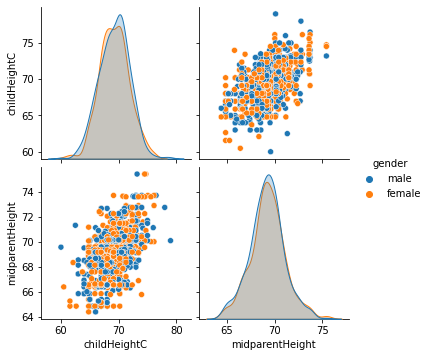

In [38]:
sns.pairplot(df[['childHeightC', "midparentHeight", "gender"]], hue="gender")

**Linear regression with Python**

L'objectif de ce TP est d'entraîner un modèle de régression simple pour prédire la taille des enfants (la variable réponse $y$ est "childHeightC") en fonction de la taille moyenne des parents (le prédicteur $x$ est "midparentHeight")

Nous utilisons patsy, qui est une bibliothèque Python permettant de décrire des modèles statistiques et de construire des matrices de design à l'aide de formules de type R ('childHeightC ~ midparentHeight').

In [44]:
from patsy import dmatrices

In [46]:
outcome, predictors = dmatrices(
    "childHeightC ~ midparentHeight", data=df
)

predictors

DesignMatrix with shape (934, 2)
  Intercept  midparentHeight
          1            75.43
          1            75.43
          1            75.43
          1            75.43
          1            73.66
          1            73.66
          1            73.66
          1            73.66
          1            72.06
          1            72.06
          1            72.06
          1            72.06
          1            72.06
          1            72.06
          1            72.06
          1            69.09
          1            69.09
          1            69.09
          1            69.09
          1            69.09
          1            69.09
          1            73.72
          1            73.72
          1            73.72
          1            73.72
          1            73.72
          1            73.72
          1            73.72
          1            72.91
          1            72.91
  [904 rows omitted]
  Terms:
    'Intercept' (column 0)
    'midpar

In [ ]:
#y,x = dmatrices('chilfheightc' ~ 'midparentheight' , data= df, return_type = 'dataframe) 

Nous utilisons la fonction dmatrices de patsy pour créer des matrices de design. La première est une matrice réponse, la variable à expliquer, ici childHeightC. La seconde est une matrice de prédicteur ; ici, elle correspond dans un premier temps à la variable midparentHeight.

Comme nous voulons d'abord calculer une régression linéaire de childHeightC par rapport à midparentHeight, nous construisons les matrices de design de la manière suivante.

In [40]:
#fill in the blanks 
import statsmodels.api as sm

X = sm.add_constant(df["midparentHeight"])
y = df["childHeightC"]

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           childHeightC   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     305.8
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           2.00e-59
Time:                        16:29:39   Log-Likelihood:                -2079.0
No. Observations:                 934   AIC:                             4162.
Df Residuals:                     932   BIC:                             4172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              19.9175      2.821     

In [41]:
X

,const,midparentHeight
0,1.0,75.43
1,1.0,75.43
2,1.0,75.43
3,1.0,75.43
4,1.0,73.66
...,...,...
929,1.0,66.64
930,1.0,66.64
931,1.0,66.64
932,1.0,65.27


La commande OLS de statsmodels.api effectue une régression linéaire. La formule utilisée pour calculer les matrices de conception ci-dessus est celle qui explique la ou les variables à utiliser et l'ensemble de données.


In [ ]:
mod = sm.OLS(y,X)
#fill in the blakns 



Nous pouvons voir les coefficients en appelant directement res.params.


In [ ]:
res.params


statsmodels.api.OLS calcule automatiquement les variances de chaque paramètre (ainsi que de nombreuses autres quantités que nous étudierons plus tard). Elles sont disponibles avec la commande summary :


In [ ]:
res.summary()



Cela donne les valeurs estimées (estimation) de l'intercept et de la pente appelées respectivement (Intercept) et midparentHeight ainsi que leurs écarts types estimés.

Nous pouvons également utiliser sns pour visualiser la régression. Notez que la régression linéaire est recalculée à la volée ici, avec la fonction lmplot.

In [53]:
#fill in the blanks
# import numpy as np

# # arr
# X_regression_line ={ ""np.linspace(62, 80, 100)}

import plotly.express as px

fig = px.scatter(df, x="midparentHeight", y="childHeightC", trendline="ols")

fig.update_layout(
    height=500,
    width=500
)

fig.show()

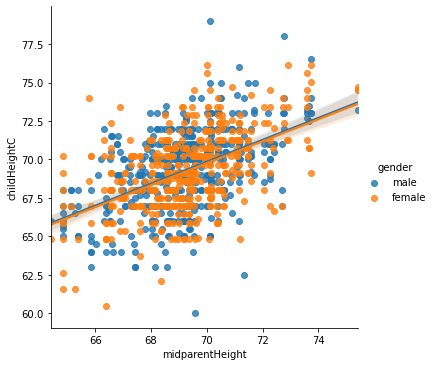

In [50]:
g = sns.lmplot(x="midparentHeight", y="childHeightC", hue="gender",data=df)